<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Previs%C3%A3o_de_TurnOver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de TurnOver**
---
[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)


![img](https://image.freepik.com/fotos-gratis/negocios-conceito-de-entrevista-de-emprego_1421-77.jpg)

A cultura da utilização de dados para tomada de decisões vem crescendo de forma espantosa em todo o mundo. Atingindo os diversos setores de, desde o mais arcaico até o mais moderno, não é difícil de se imaginar que dentro das estruturas das empresas há possibilidades incríveis de se trabalhar orientado a dados.

Dentro dessas muitas possibilidades, podemos citar a utilização em departamento de Recursos Humanos (RH) em situações como o **acompanhamento e seleção de candidatos a vagas**, **recomendação de vagas**, **gerenciamento de habilidades**, **desenvolvimento de habilidades**, **análise de churn**, **detecção de atrito**, **redução de turnover**, **análise de upsell** etc.


## Sobre o projeto
> A intenção é fazer uma análise nos dados da empresa a fim de encontrar possíveis soluções para a diminuir o **turnover**, ou seja, a rotatividade de pessoas na empresa, fazendo com que bons profissionais sejam retidos.

> Será possível prever possíveis atritos dentro da empresas? Vamos criar um modelo de Machine Learning com essa finalidade.



## Obtenção dos dados

> Os dados utilizados foram criados por Cientistas de Dados da [IBM]('https://www.ibm.com/br-pt') e são advindos do [Kaggle]('https://kaggle.com/'), mas foram postos diretamente em meu [GitHub](https://github.com/amadords).


## Dicionário de variáveis
Breve explicação das variáveis categóricas:

* Education 
  * 1 'Below College'
  * 2 'College'
  * 3 'Bachelor'
  * 4 'Master'
  * 5 'Doctor'

* EnvironmentSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* JobInvolvement
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* JobSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* PerformanceRating
  * 1 'Low'
  * 2 'Good'
  * 3 'Excellent'
  * 4 'Outstanding'

* RelationshipSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* WorkLifeBalance
  * 1 'Bad'
  * 2 'Good'
  * 3 'Better'
  * 4 'Best'

**Importantos as bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**Importando os dados**

In [2]:
dados = 'https://raw.githubusercontent.com/amadords/data/main/turnover-rh.csv'
df = pd.read_csv(dados)

**Visualizando os primeiros dados**

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Tamanho do dataset**

In [4]:
print("Informações Sobre o Dataset")
print("Variáveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}\n".format(df.shape[0]))
print("O dataset não apresenta dados ausentes:\n")

Informações Sobre o Dataset
Variáveis:	 35
Entradas:	 1470

O dataset não apresenta dados ausentes:



**Tipos de variáveis**

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

### **Informações estatísticas para variáveis numéricas**


Algumas análises iniciais:

* A média de idade na empresa é de quase 37 anos de idade.
* A maioria dos funcionários possui Ensino Superior.
* Como se trata de um conjunto de dados oriundo dos Estados Unidos, consideramos os valores monetários como Dólar. Neste caso, o salário médio mensal da empresa é de US$ 6502.93 (seis mil quinhentos e dois doláres e novente e três cents).

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### **Informações estatísticas para variáveis categóricas**

Note que há uma variável `Attrition`, ou seja, atrito que indica se o funcionário possui atrito no ambiente de trabalho.

Nosso foco será em cima dessa variável.



In [7]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### **Gênero**

Essa variável é importante para que possamos ver se é equidade de gênero na empresa, ou seja, se o número de funcionários homens e mulheres são proporcionais.

**Agrupamento de Educação por Gênero**

In [8]:
df.groupby(['Gender']).Education.value_counts(ascending=False)

Gender  Education
Female  3            235
        4            154
        2            117
        1             60
        5             22
Male    3            337
        4            244
        2            165
        1            110
        5             26
Name: Education, dtype: int64

**Distribuição de Educação por Gênero**

In [9]:
df.groupby(['Gender']).Education.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,2.933673,1.007986,1.0,2.0,3.0,4.0,5.0
Male,882.0,2.899093,1.035148,1.0,2.0,3.0,4.0,5.0


**Distribuição de Renda por Gênero**

In [10]:
df.groupby(['Gender']).MonthlyIncome.describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,6686.566327,4695.608507,1129.0,3037.0,5081.5,8711.75,19973.0
Male,882.0,6380.507937,4714.856577,1009.0,2819.5,4837.5,8113.75,19999.0


**O que podemos entender?**

- A empresa apresenta salários maiores para as mulheres em média, perdendo por pouco no valor máximo.

- O que foi dito acima é justificável, uma vez que as mulheres possuem maior nível educacional, em média.

**Transformação da variável alvo**

`Yes` = 1.

`No` = 0.

Após isso será criada uma coluna com os valores transformados, deixando a original intacta.

In [11]:
# transformando a variável
target_map = {'Yes':1, 'No':0}
# criando a coluna alvo
df["Attrition_numerical"] = df["Attrition"].apply(lambda x: target_map[x])

**Visualizando a nova coluna**

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


**Gráfico de Densidade**

Dentre as muitas utilizações, aqui o objetivo é analisar as distribuições para tentar identificar variáveis mais relevantes para o problema.

Lembre que através de modelos baseados em árvores conseguimos ver a `feature importance` com outra abordagem. Veja um exemplo com **Random Forest** [aqui](https://github.com/amadords/Projetos-Publicos/blob/master/Floresta_Aleat%C3%B3ria_(Algoritmo).ipynb).

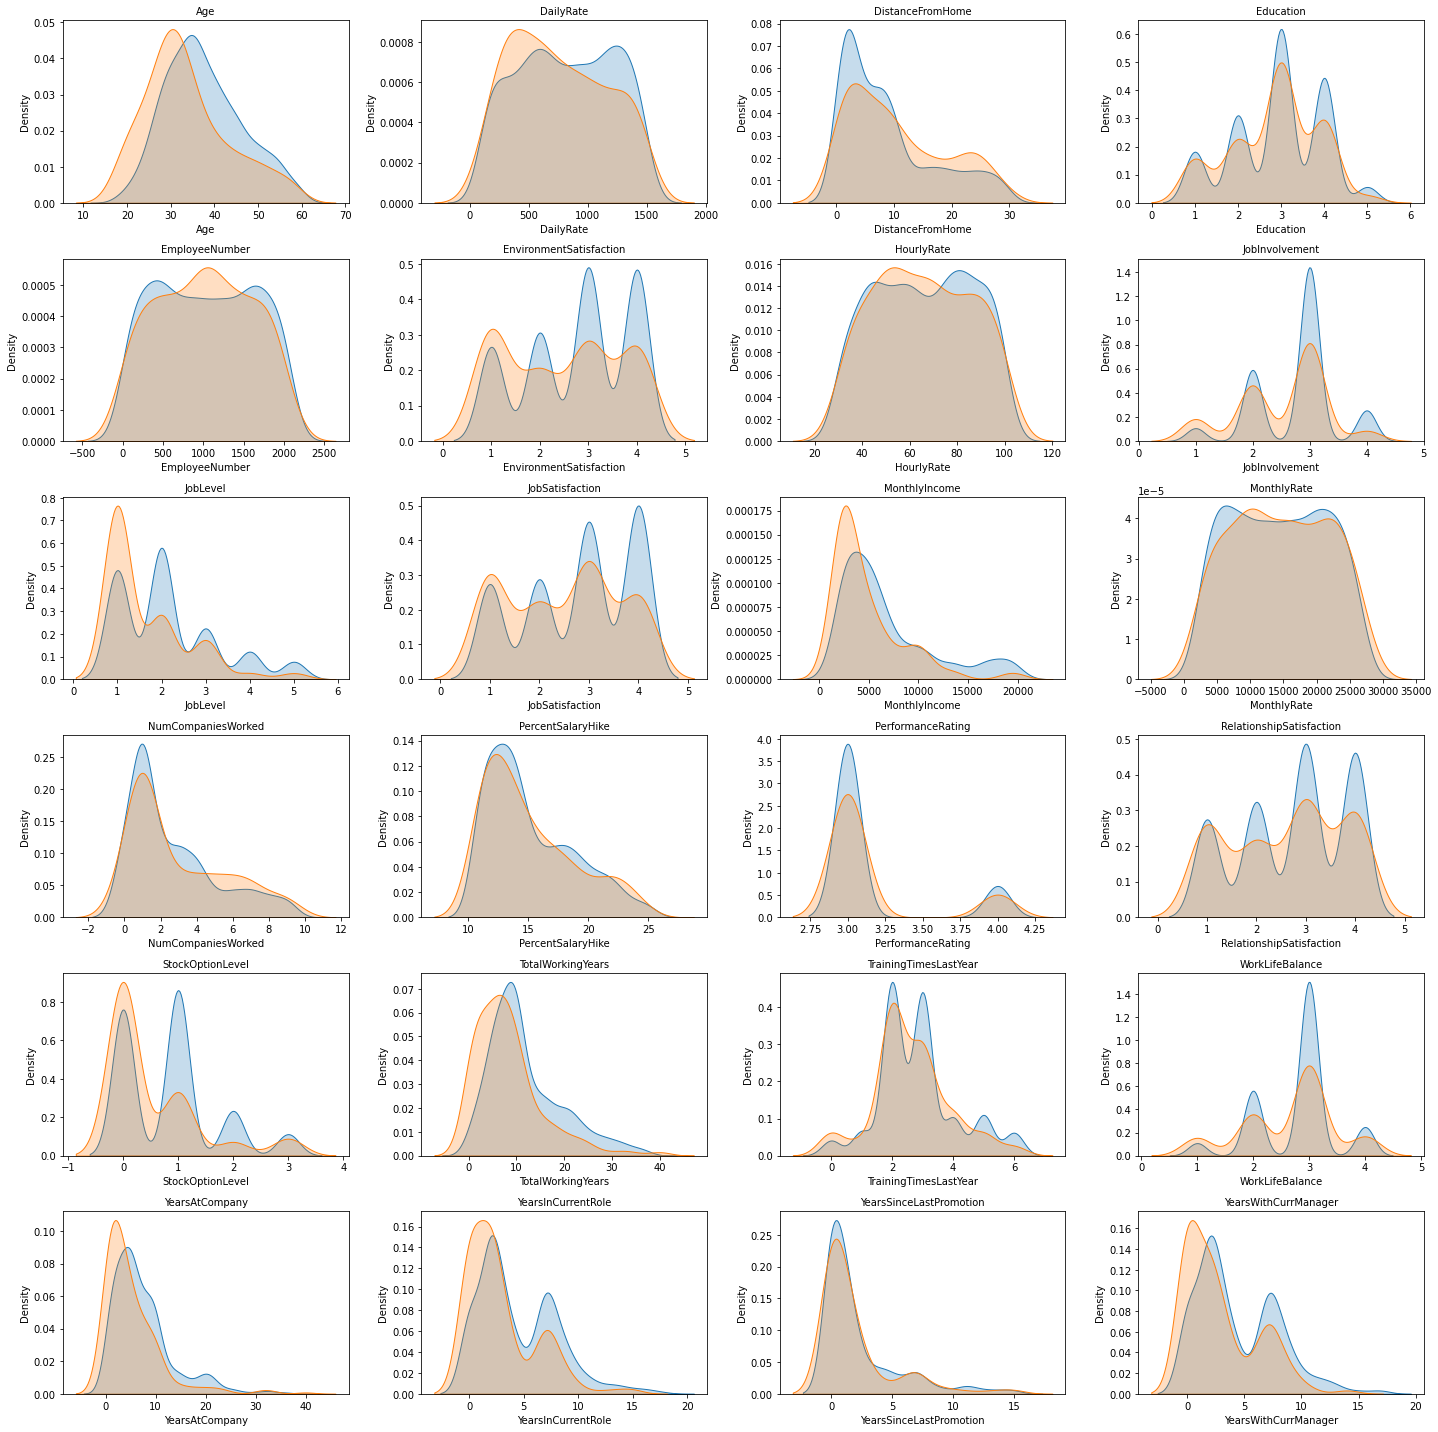

In [13]:
# plotando gráfico de densidade
colunas = df.drop(['Attrition', 'BusinessTravel', 'Department',
                       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
                       'Over18', 'OverTime','EmployeeCount', 'StandardHours', 'Attrition_numerical'], axis=1).columns
num_plots = len(colunas)
df_class_0 = df[df.Attrition_numerical == 0]
df_class_1 = df[df.Attrition_numerical == 1]

fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in colunas:
    idx += 1
    plt.subplot(6, 4, idx)
    sns.kdeplot(df_class_0[col], label="Sem Atrito", shade=True)
    sns.kdeplot(df_class_1[col], label="Atrito", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.savefig('density.png')

**Insights**

A representação amarela são para os funcionários que apresentam atritos e a representação azul para funcionários que não apresentam.

Com a diferença nas distribuições vemos algumas informações importantes:

* `Age` (Idade): Quanto mais jovem, mais propensão a atrito há.
* `DistanceFromHome` (Distância de Casa): Quanto maior a distância, mais propenso o funcionário está a atrito.
* `JobInvolvement`(Envolvimento no Trabalho): Indivíduos menos envolvidos tendem a ter mais atrito.
* `JobLevel` (Nível no Emprego): Funcionários em níveis mais baixos tendem a ter mais atrito. O mesmo acontece para as variáveis `JobSatisfaction` (Satisfação no Trabalho) e `MonthlyIncome` (Renda Mensal).
* `StockOptionLevel` (ESOs) e `TotalWorkingYears` (Total de Anos Trabalhando), também demonstram diminuição nos atritos conforme os números aumentam.
* `YearsAtCompany` (Anos na Empresa), `YearsInCurrentRole` (Anos na Posição Atual), `YearsSinceLastPromotion` (Anos Desde a Última Promoção), `YearsWithCurrManager` (Anos Com o Mesmo Gerente) apresentam maior atrito nos menores períodos de tempo, e evolução ao longo do tempo. Isso pode sugerir dificuldades de adaptação, pois quanto menor o tempo, maior o atrito.





**E a variável alvo, como está sua distribuição?**

0  = Sem atrito é igual a  1233.

1  = Com atrito é igual a  237.


Ou seja, 16% dos funcionários têm atrito.

0    1233
1     237
Name: Attrition_numerical, dtype: int64

Atritos Representam 16.12% Do Dataset.



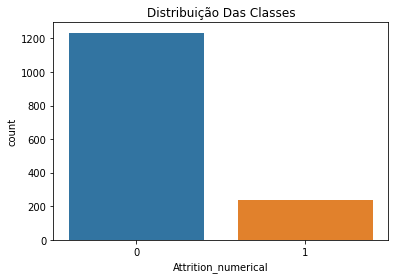

In [14]:
# distribuição da variável alvo
print(df.Attrition_numerical.value_counts())
print("\nAtritos Representam {:.2f}% Do Dataset.\n".format((df[df.Attrition_numerical == 1].shape[0] / df.shape[0]) * 100))

# gráfico de barras
fig, ax = plt.subplots()
sns.countplot('Attrition_numerical', data=df, ax=ax)
ax.set_title('Distribuição Das Classes')
plt.plot()
plt.savefig('original_dist.png')

**Copiando o dataset e retirando colunas não representativas ao modelo**

In [15]:
# criando cópia do dataset
df_minmax = df.copy()

# retirando colunas não representativas
df_minmax.drop(['Attrition', 'Over18'], axis=1, inplace=True)

df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2,0


### **Aplicando o LabelEncoder**

Para transformar os formatos categóricos em numéricos.

In [16]:
# instanciando o encoder
le = LabelEncoder()

# encoding de variáveis numéricas
df_minmax['BusinessTravel'] = le.fit_transform(df_minmax['BusinessTravel'])
df_minmax['Department'] = le.fit_transform(df_minmax['Department'])
df_minmax['EducationField'] = le.fit_transform(df_minmax['EducationField'])
df_minmax['Gender'] = le.fit_transform(df_minmax['Gender'])
df_minmax['JobRole'] = le.fit_transform(df_minmax['JobRole'])
df_minmax['MaritalStatus'] = le.fit_transform(df_minmax['MaritalStatus'])
df_minmax['OverTime'] = le.fit_transform(df_minmax['OverTime'])

# checando o resultado
df_minmax.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0


**Dataset original**

In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


**Padronizando os dados com o MinMaxScaler**

Ajuda contra os outliers.

In [18]:
# MinMaxScaler
scaler = MinMaxScaler()
df_minmax[['Age']] = scaler.fit_transform(df_minmax[['Age']])
df_minmax[['DailyRate']] = scaler.fit_transform(df_minmax[['DailyRate']])
df_minmax[['EmployeeCount']] = scaler.fit_transform(df_minmax[['EmployeeCount']])
df_minmax[['EmployeeNumber']] = scaler.fit_transform(df_minmax[['EmployeeNumber']])
df_minmax[['HourlyRate']] = scaler.fit_transform(df_minmax[['HourlyRate']])
df_minmax[['MonthlyIncome']] = scaler.fit_transform(df_minmax[['MonthlyIncome']])
df_minmax[['MonthlyRate']] = scaler.fit_transform(df_minmax[['MonthlyRate']])
df_minmax[['NumCompaniesWorked']] = scaler.fit_transform(df_minmax[['NumCompaniesWorked']])
df_minmax[['PercentSalaryHike']] = scaler.fit_transform(df_minmax[['PercentSalaryHike']])
df_minmax[['StandardHours']] = scaler.fit_transform(df_minmax[['StandardHours']])
df_minmax[['TotalWorkingYears']] = scaler.fit_transform(df_minmax[['TotalWorkingYears']])
df_minmax[['TrainingTimesLastYear']] = scaler.fit_transform(df_minmax[['TrainingTimesLastYear']])
df_minmax[['YearsAtCompany']] = scaler.fit_transform(df_minmax[['YearsAtCompany']])
df_minmax[['YearsInCurrentRole']] = scaler.fit_transform(df_minmax[['YearsInCurrentRole']])
df_minmax[['YearsSinceLastPromotion']] = scaler.fit_transform(df_minmax[['YearsSinceLastPromotion']])
df_minmax[['YearsWithCurrManager']] = scaler.fit_transform(df_minmax[['YearsWithCurrManager']])

# checando o resultado
df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,0.547619,2,0.715820,2,1,2,1,0.0,0.000000,2,0,0.914286,3,2,7,4,2,0.262454,0.698053,0.888889,1,0.000000,3,1,0.0,0,0.200,0.0,1,0.15,0.222222,0.000000,0.294118,1
1,0.738095,1,0.126700,1,8,1,1,0.0,0.000484,3,1,0.442857,2,2,6,2,1,0.217009,0.916001,0.111111,0,0.857143,4,4,0.0,1,0.250,0.5,3,0.25,0.388889,0.066667,0.411765,0
2,0.452381,2,0.909807,1,2,2,4,0.0,0.001451,4,1,0.885714,2,1,2,3,2,0.056925,0.012126,0.666667,1,0.285714,3,2,0.0,0,0.175,0.5,3,0.00,0.000000,0.000000,0.000000,1
3,0.357143,1,0.923407,1,3,4,1,0.0,0.001935,4,0,0.371429,3,1,6,3,1,0.100053,0.845814,0.111111,1,0.000000,3,3,0.0,0,0.200,0.5,3,0.20,0.388889,0.200000,0.000000,0
4,0.214286,2,0.350036,1,2,1,3,0.0,0.002903,1,1,0.142857,3,1,2,2,1,0.129489,0.583738,1.000000,0,0.071429,3,4,0.0,1,0.150,0.5,3,0.05,0.111111,0.133333,0.117647,0


**Divisão do dataset**

In [19]:
# separando o dataset
X = df_minmax.drop('Attrition_numerical', axis=1)
y = df['Attrition_numerical']

# dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

**Balanceando as classes com UnderSampler**

Manteremos intacta a classe minoritária, que é a com atritos e reduziremos a majoritária, tentando preservar suas características.

1    178
0    178
dtype: int64


Text(0.5, 1.0, 'Distribuição Das Classes')

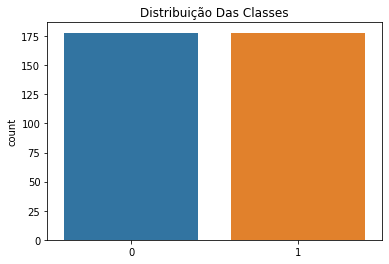

In [20]:
# aplicando o UnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# checando o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotando a nova distribuição das classes
sns_plot = sns.countplot(y_rus);
plt.title("Distribuição Das Classes")
#plt.savefig("balanced.png")

**Criando cópia dos dados desbalanceados e dividindo os dados**

In [21]:
# criando uma cópia dos dados desbalanceados
df_desbalanceado = df_minmax.copy()

# separando as variáveis entre X e y
desb_X = df_desbalanceado.drop('Attrition_numerical', axis=1)
desb_y = df_desbalanceado['Attrition_numerical']

# dividindo o conjunto de dados
desb_X_train, desb_X_test, desb_y_train, desb_y_test = train_test_split(desb_X, desb_y, stratify=y, shuffle=True)

### **Regressão Logística com Dados Desbalanceados**

Será o baseline, ou seja, tentaremos melhorar a partir de seus números.

In [22]:
# instanciando e treinando um modelo de Regressão Logística
np.random.seed(2)
desb_model = LogisticRegression()
desb_model.fit(desb_X_train, desb_y_train)

# instanciando e treinando um modelo de Regressão Logística
results = cross_val_score(desb_model, desb_X_train, 
                          desb_y_train, cv = 5, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)

Acurácia média: 87.20%
Intervalo de acurácia: [84.19% ~ 90.22%]


### **Previsões**

In [23]:
# fazendo previsões
desb_y_pred = desb_model.predict(desb_X_test)
desb_y_proba = desb_model.predict_proba(desb_X_test)

# plotando a matrix de confusão
confusion_matrix(desb_y_test, desb_y_pred, normalize='true')

# imprimindo o Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(desb_y_test, desb_y_pred, digits=4))

# Imprimindo a Acurácia
print("Acurácia: {:.4f}\n".format(accuracy_score(desb_y_test, desb_y_pred)))


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8839    0.9612    0.9209       309
           1     0.6250    0.3390    0.4396        59

    accuracy                         0.8614       368
   macro avg     0.7545    0.6501    0.6802       368
weighted avg     0.8424    0.8614    0.8438       368

Acurácia: 0.8614



### **Regressão Logística com Dados Balanceados**

In [24]:
# instanciando e treinando um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
results = cross_val_score(model, X_rus, 
                          y_rus, cv = 5, scoring = 'accuracy')
intervalo(results)

model.fit(X_rus, y_rus)


Acurácia média: 74.43%
Intervalo de acurácia: [71.50% ~ 77.36%]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **Previsões**

In [25]:
# fazendo previsões
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Matriz de Confusão
confusion_matrix(y_test, y_pred, normalize='true')

# Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# Acurácia
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9456    0.7314    0.8248       309
           1     0.3566    0.7797    0.4894        59

    accuracy                         0.7391       368
   macro avg     0.6511    0.7555    0.6571       368
weighted avg     0.8512    0.7391    0.7710       368

Acurácia: 0.7391



**Veja que com os dados balanceados o algoritmo cai de rendimento.

### **Random Forest**

In [26]:
# criando e treinando o modelo
seed = 0
rf = RandomForestClassifier(n_jobs = -1,
                            n_estimators= 1000,
                            max_features= 0.3,
                            max_depth= 3,
                            min_samples_leaf= 3,
                            random_state= seed, verbose= 0)

# cross validation Random Forest Classifier
results = cross_val_score(rf, X_rus, 
                          y_rus, cv = 5, scoring = 'accuracy')
intervalo(results)

Acurácia média: 73.31%
Intervalo de acurácia: [71.51% ~ 75.12%]


### **Previsões**

In [27]:
# fazendo previsões
rf.fit(X_rus, y_rus)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# Relatório de Classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred, digits=4))

# Acurácia
print('Acurácia:\t {:.4f}\n'.format(accuracy_score(y_test, y_pred)))


# confusion matrix
confusion_matrix(y_test, y_pred, normalize='true');

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9106    0.7249    0.8072       309
           1     0.3033    0.6271    0.4088        59

    accuracy                         0.7092       368
   macro avg     0.6069    0.6760    0.6080       368
weighted avg     0.8132    0.7092    0.7433       368

Acurácia:	 0.7092



### **Feature Importances**

Como já dito antes, com algoritmos baseados em árvores conseguimos em uma abordagem diferente visualizar quais variáveis são importantes para o modelo.

In [28]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

**Plotando as features mais importantes para o modelo**

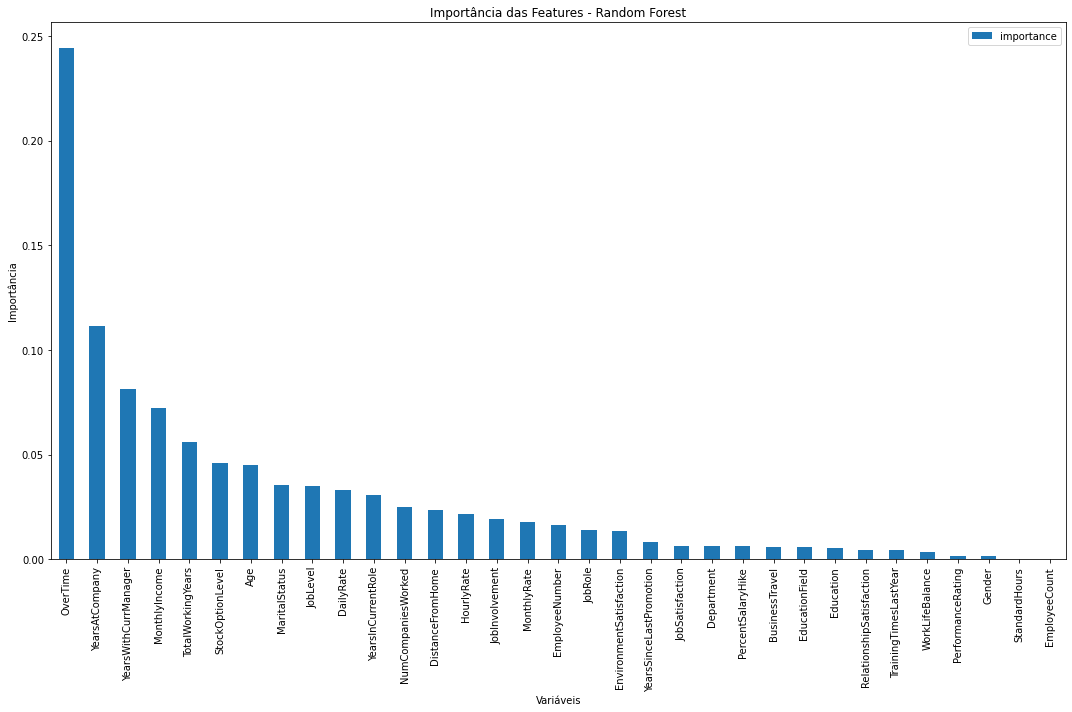

In [29]:
fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Random Forest")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")

plt.savefig("feat_imp.png")
plt.tight_layout()

### **Conclusão**

As florestas aleatória não melhoraram o nosso modelo.

Podemos destacar entre as variáveis importantes:

- MonthlyIncome (Salário Mensal)

- OverTime (Horas Extras)

- JobLevel (Nível do Cargo)

- TotalWorkingYears (Anos Trabalhando)

- Age (Idade)

- YearsWithCurrentManager (Anos com o Gerente Atual)

Hipóteses relativas aos níveis de estresse, sentimento de desvalorização, bem estar financeiro, social, dentre outras coisas, são hipóteses válidas que, somente com análise mais profunda poderão ser comprovadas.

Além de outras possibilidades no próprio atual modelo devem ser pensadas como Pré-processamentos, Engenharia de Features, utilizar outros modelos e Tuning de parâmetros.

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)


<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>